In [1]:
# 패키지 import
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 시각화의 선명도를 높임
%config InlineBackend.figure_format = "retina"

# seaborn 스타일 설정
sns.set(style='white', rc={'figure.figsize':(20, 5)})

# 한글설정
plt.rc('font', family='Malgun Gothic') # 윈도우즈
plt.rc('axes', unicode_minus=False) # 축의 - 깨짐 방지

# warning(경고) 안보이게
import warnings
warnings.filterwarnings(action='ignore')
# warnings.filterwarnings(action='default')

지역          0
2013년12월    0
2014년1월     0
2014년2월     0
2014년3월     0
2014년4월     0
2014년5월     0
2014년6월     0
2014년7월     0
2014년8월     0
2014년9월     0
2014년10월    0
2014년11월    0
2014년12월    0
2015년1월     0
2015년2월     0
2015년3월     0
2015년4월     0
2015년5월     0
2015년6월     0
2015년7월     0
2015년8월     0
dtype: int64

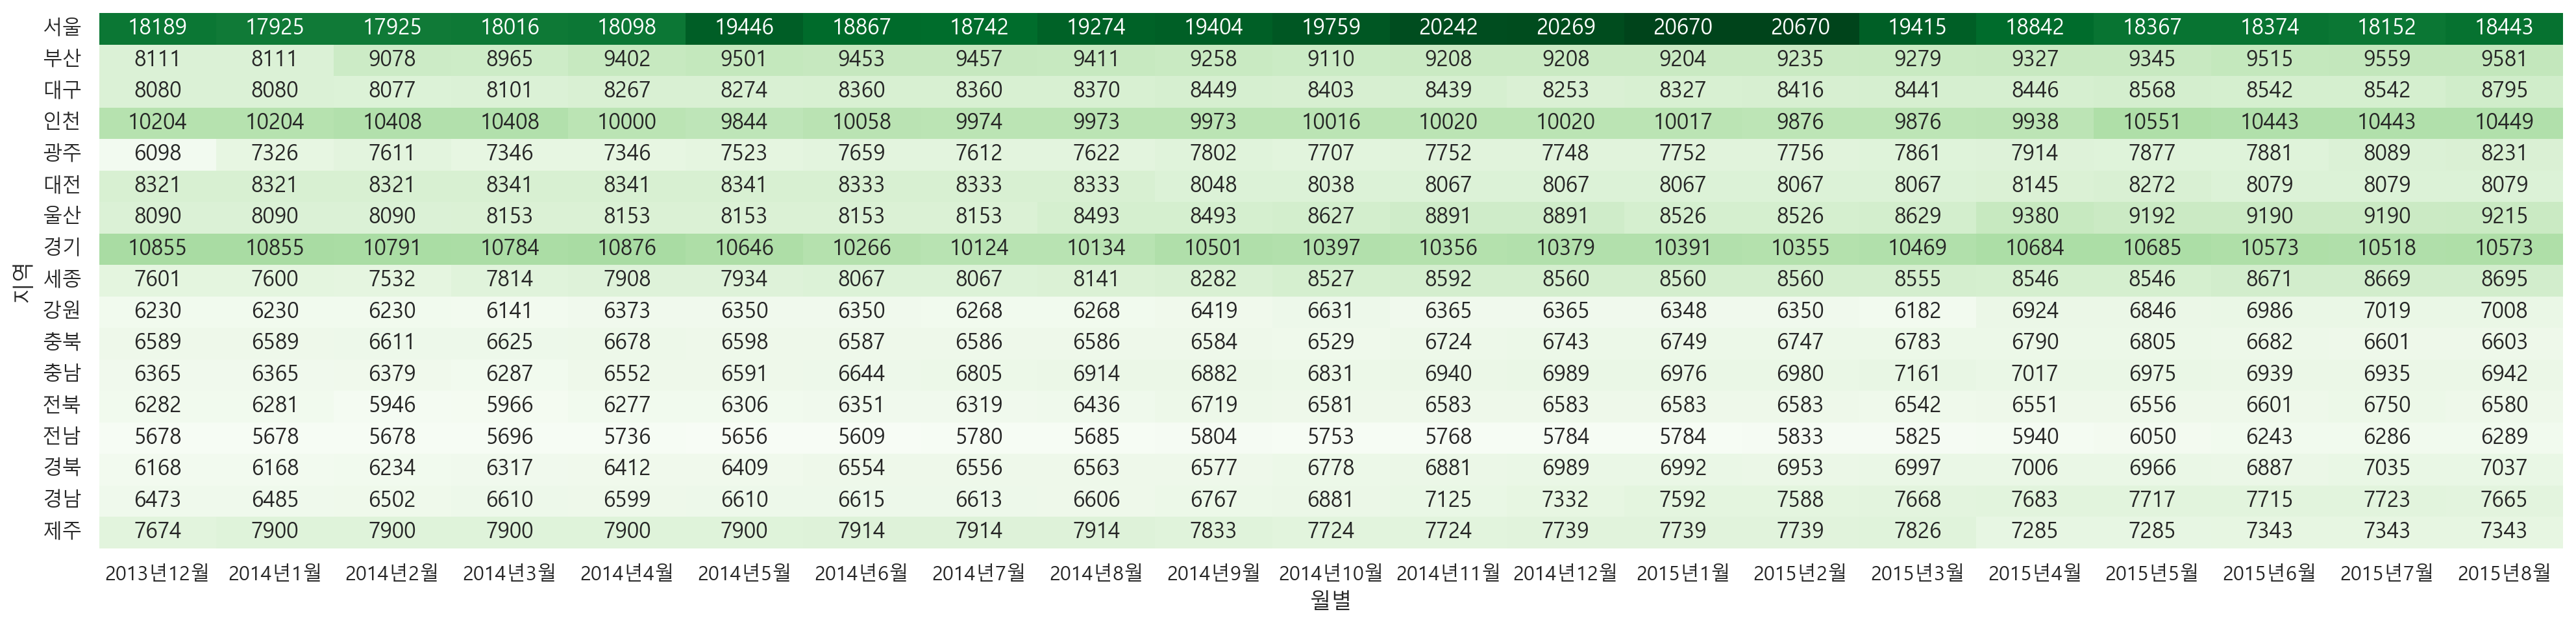

In [19]:
# 1번
df_first = pd.read_csv(r'C:\ai_x\download\shareData\부동산_250213\전국 평균 평당 분양가격(2013년 9월부터 2015년 8월까지).csv',
            encoding='cp949')
display(df_first.isnull().sum())
df_heatmap = df_first.set_index('지역')

plt.figure(figsize=(20, 5))
sns.heatmap(df_heatmap, annot=True, fmt='.0f', cmap='Greens', cbar=False)
plt.xticks(rotation=0)
plt.yticks(rotation=0)
plt.xlabel('월별')
plt.ylabel('지역')
plt.tight_layout()
plt.show()

In [39]:
df_last = pd.read_csv(r'C:\ai_x\source\01_python\data\전국_제곱미터당_분양가격(2015년10월부터).csv')

df_last['분양가격(제곱미터)'] = df_last['분양가격(제곱미터)'].astype(str).str.replace(',', '')
df_last['분양가격(제곱미터)'] = pd.to_numeric(df_last['분양가격(제곱미터)'], errors='coerce')

def change_pyeong(price):
    if pd.isna(price):
        return np.nan
    return round(price * 3.3)

df_last['평당분양가격'] = df_last['분양가격(제곱미터)'].apply(change_pyeong)

df_last.drop(columns=['분양가격(제곱미터)'], inplace=True)

df_last


,지역명,규모구분,연도,월,평당분양가격
0,서울,모든면적,2015,10,19275.0
1,서울,전용면적 60제곱미터이하,2015,10,18652.0
2,서울,전용면적 60제곱미터초과 85제곱미터이하,2015,10,19411.0
3,서울,전용면적 85제곱미터초과 102제곱미터이하,2015,10,18879.0
4,서울,전용면적 102제곱미터초과,2015,10,19401.0
...,...,...,...,...,...
9090,제주,모든면적,2024,8,25420.0
9091,제주,전용면적 60제곱미터이하,2024,8,NaN
9092,제주,전용면적 60제곱미터초과 85제곱미터이하,2024,8,24800.0
9093,제주,전용면적 85제곱미터초과 102제곱미터이하,2024,8,NaN


In [43]:
pivot = pd.pivot_table(df_last,
                       index='연도',
                       columns='지역명',
                       values='평당분양가격',
                       aggfunc='mean')
pivot = pivot.round(0)
pivot


지역명,강원,경기,경남,경북,광주,대구,대전,부산,서울,세종,울산,인천,전남,전북,제주,충남,충북
연도,,,,,,,,,,,,,,,,,
2015,7188.0,11061.0,8459.0,7464.0,7917.0,9019.0,8190.0,10377.0,20316.0,8765.0,9368.0,10976.0,6799.0,7110.0,7951.0,7690.0,6829.0
2016,7163.0,11685.0,8497.0,7753.0,9191.0,10282.0,8911.0,10744.0,21753.0,8858.0,9583.0,11099.0,6937.0,6907.0,9567.0,7958.0,7133.0
2017,7319.0,12296.0,8807.0,8288.0,9600.0,12192.0,9913.0,11638.0,21864.0,9133.0,10630.0,11672.0,7413.0,7406.0,12629.0,8157.0,7463.0
2018,8219.0,14258.0,9328.0,8681.0,9527.0,12139.0,10234.0,12890.0,23202.0,10340.0,10241.0,11882.0,7930.0,8175.0,11936.0,8202.0,8149.0
2019,8934.0,15665.0,10698.0,9050.0,12112.0,14082.0,12619.0,13538.0,28287.0,11299.0,10216.0,13250.0,8219.0,8532.0,11828.0,8749.0,7971.0
2020,10302.0,15106.0,10919.0,9998.0,13406.0,15314.0,11239.0,13353.0,29781.0,11628.0,12838.0,14983.0,9562.0,8559.0,14193.0,9139.0,8359.0
2021,10291.0,14567.0,11302.0,11227.0,13710.0,15586.0,11994.0,14318.0,29380.0,12578.0,14192.0,15774.0,9981.0,9048.0,22302.0,9861.0,8822.0
2022,11644.0,16622.0,12456.0,12018.0,15096.0,16822.0,14114.0,18167.0,29129.0,11310.0,17904.0,17342.0,10635.0,10003.0,18954.0,11730.0,10034.0
2023,13409.0,20175.0,13283.0,13025.0,17958.0,17657.0,17917.0,20471.0,33231.0,12278.0,18832.0,16151.0,11847.0,10966.0,24096.0,12581.0,11104.0


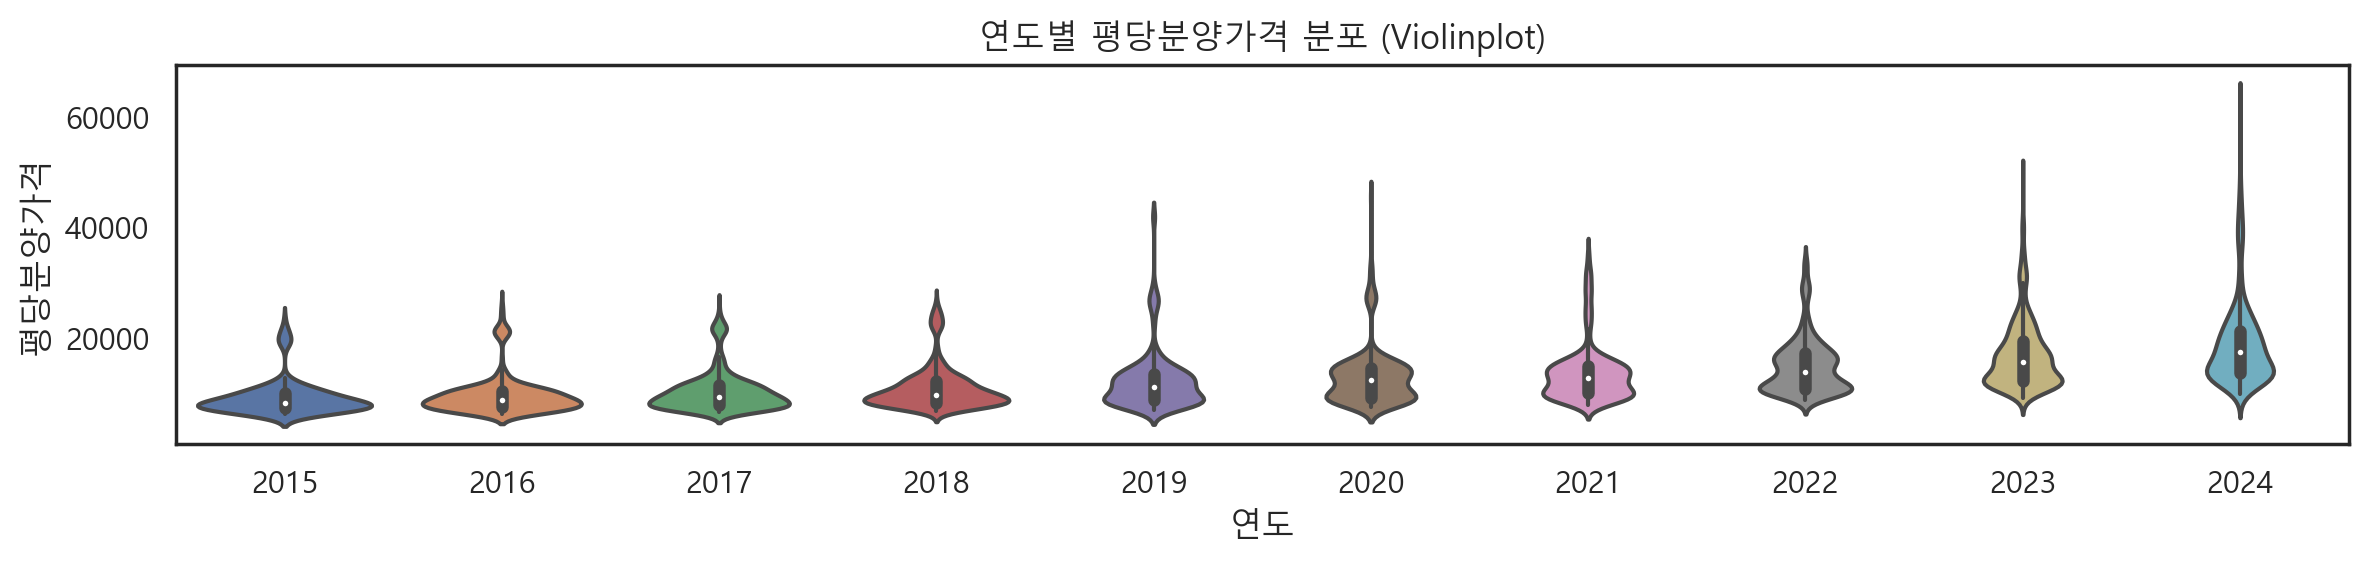

In [45]:
plt.figure(figsize=(12, 3))
sns.violinplot(x='연도', y='평당분양가격', data=df_last)

plt.title('연도별 평당분양가격 분포 (Violinplot)')
plt.xlabel('연도')
plt.ylabel('평당분양가격')
plt.tight_layout()
plt.show()

In [49]:
df_first_melted = df_first.melt(id_vars='지역', var_name='년월', value_name='평당분양가격')

def split_year_month(ym):
    year, month_str = ym.split('년')
    year = int(year)
    month = int(month_str.replace('월', ''))
    return pd.Series([year, month])

df_first_melted[['연도', '월']] = df_first_melted['년월'].apply(split_year_month)
df_first_melted = df_first_melted.drop(columns='년월')
df_first_melted = df_first_melted.rename(columns={'지역': '지역명'})

df_first_cleaned = df_first_melted[df_first_melted['평당분양가격'].notna()]

df_last_filtered = df_last[
    (df_last['규모구분'] == '모든면적') & 
    (df_last['평당분양가격'].notna())
][['지역명', '평당분양가격', '연도', '월']].copy()

df = pd.concat([df_first_cleaned, df_last_filtered], ignore_index=True)
df = df.reset_index(drop=True)

df

,지역명,평당분양가격,연도,월
0,서울,18189.0,2013,12
1,부산,8111.0,2013,12
2,대구,8080.0,2013,12
3,인천,10204.0,2013,12
4,광주,6098.0,2013,12
...,...,...,...,...
2145,전북,12058.0,2024,8
2146,전남,13121.0,2024,8
2147,경북,13827.0,2024,8
2148,경남,13253.0,2024,8
